In [179]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import glob
import cv2
import random
import time
import sys
import tifffile as tiff

In [180]:
import os
path = "/kaggle/input/"
print(os.listdir(path))


['satelite-data']


In [181]:
file_path = '/kaggle/input/satelite-data/satalite data/data/images'
labels_path = '/kaggle/input/satelite-data/satalite data/data/labels'

DIR = os.getcwd()
DIR

'/kaggle/working'

In [182]:
print("[INFO] : Load all the images.....")
ImgDir = os.path.join(DIR, file_path)
labelDir = os.path.join(DIR, labels_path)
imgs = glob.glob(ImgDir + '*/*.tif')
labels = glob.glob(labelDir + '*/*.png')
len(imgs), len(labels)

[INFO] : Load all the images.....


(306, 456)

In [183]:
imgs.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
labels.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

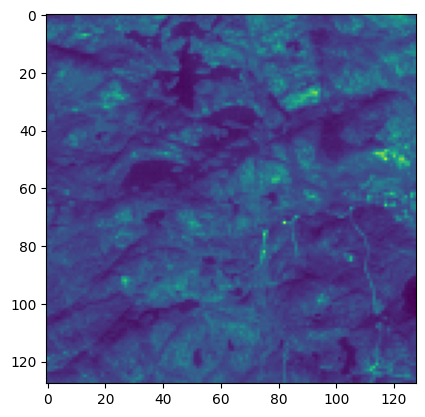

In [184]:
im = tiff.imread('/kaggle/input/satelite-data/satalite data/data/images/0.tif')
plt.imshow(im[:,:,1])

In [185]:
images = []
masks = []
def load_images(img, label):
    images.append(img)
    masks.append(label)
    return images, masks

/kaggle/input/satelite-data/satalite data/data/images/100.tif
/kaggle/input/satelite-data/satalite data/data/labels/100.png
(128, 128, 12) int16


Text(0.5, 1.0, 'Water Mask')

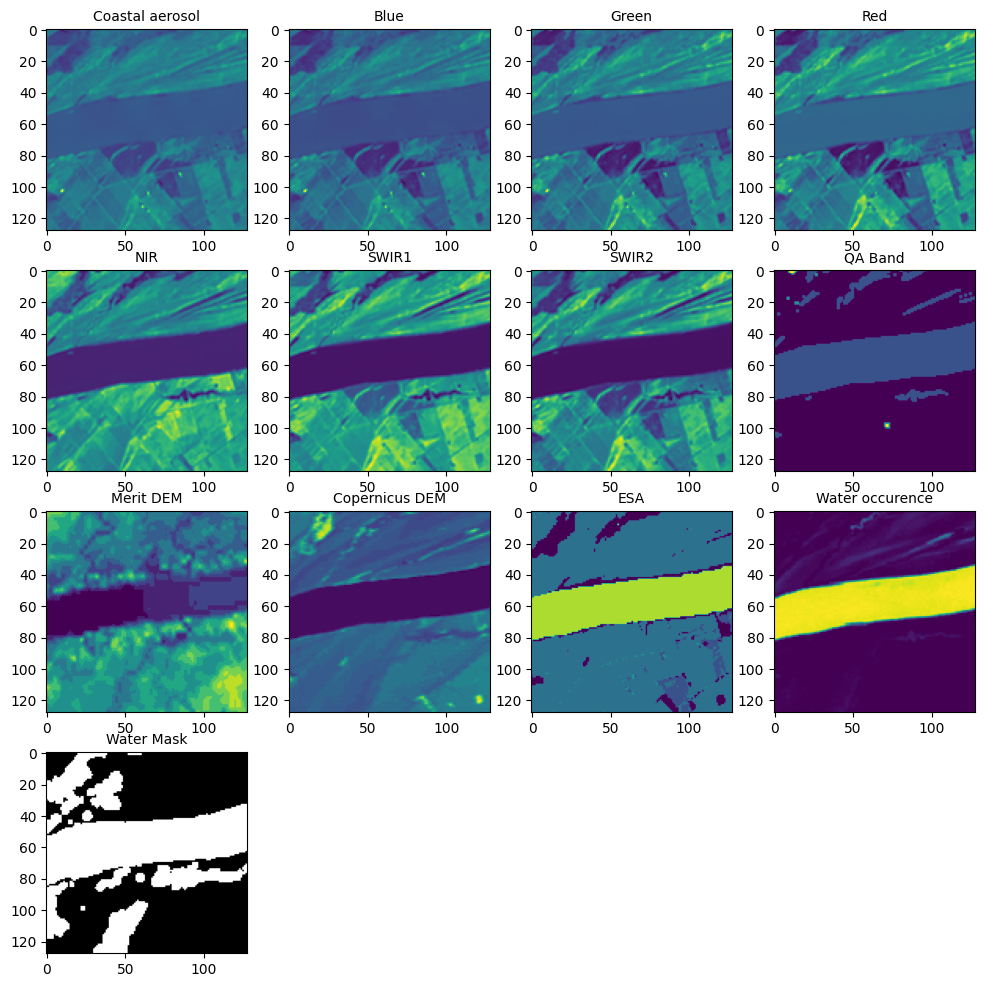

In [186]:
import tifffile as tiff
plt.figure(figsize=(12,12))
classes =['Coastal aerosol', 'Blue', 'Green', 'Red', 'NIR','SWIR1', 'SWIR2', 'QA Band', 'Merit DEM','Copernicus DEM','ESA','Water occurence']
i=100
im = imgs[i]
lab = labels[i]
print(im)
print(lab)
# Read the TIFF image
image = tiff.imread(im)

# Print shape and dtype
print(image.shape, image.dtype)
# Convert to NumPy array and visualize
for j in range(1, 13):
    plt.subplot(4,4,j)
    plt.imshow(image[:,:,j-1])
    plt.title(classes[j-1], fontsize=10)


label_img=cv2.imread(lab)*255
plt.subplot(4,4,13)
plt.imshow(label_img)
plt.title('Water Mask', fontsize=10)


In [187]:
X = []
Y =[]

def extract_layers(image, layers):
    """
    Extract specific layers from the image.
    
    Parameters:
    image (numpy.ndarray): The input image.
    layers (list): The list of layers to extract.
    
    Returns:
    numpy.ndarray: The image with only the specified layers.
    """
    return image[:, :, layers]

for img,lab in zip(imgs,labels[:305]):
    images, masks = load_images(img, lab)
    x = tiff.imread(img)
    x = extract_layers(x, [6,7,9,10,11])
    y = cv2.imread(lab,cv2.IMREAD_GRAYSCALE)
    X.append(x)
    Y.append(y)

In [188]:
X[0].shape, Y[0].shape

((128, 128, 5), (128, 128))

[[[  19   96  114   40    4]
  [  20   96  113   40    4]
  [  17   96  113   40    5]
  ...
  [2312  192  123   50    0]
  [1934  192  122   50    0]
  [1226  192  121   50    0]]

 [[  17   96  114   40    5]
  [  16   96  114   40    5]
  [  16   96  114   40    6]
  ...
  [2137  192  123   50    0]
  [1831  128  124   50    0]
  [1280  128  121   30    0]]

 [[  15   96  113   40    6]
  [  16   96  114   40    6]
  [  13   96  114   40    4]
  ...
  [2264  128  125   50    0]
  [1846  128  126   50    0]
  [1148  128  122   50    0]]

 ...

 [[3109   64  122   60    0]
  [2724   64  122   30    0]
  [1897   64  122   30    0]
  ...
  [2320   64  123   40    0]
  [2377   64  122   40    0]
  [2272   64  121   40    0]]

 [[3577   64  122   60    0]
  [3475   64  122   60    0]
  [2468   64  122   30    0]
  ...
  [2428   64  122   40    0]
  [2321   64  121   40    0]
  [2146   64  121   40    0]]

 [[3240   64  123   50    0]
  [3595   64  123   50    0]
  [2878   64  123   50    

Text(0.5, 1.0, 'Water Mask')

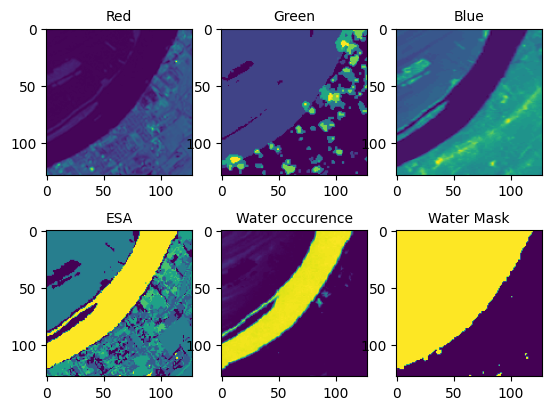

In [ ]:
classes =['QA Band', 'Merit DEM','Copernicus DEM','ESA','Water occurence']
i=12
im = X[i]
lab = Y[i]
print(im)
print(lab)
# Read the TIFF image
#image = tiff.imread(im)

# Print shape and dtype
print(im.shape, im.dtype)
# Convert to NumPy array and visualize
for j in range(1, 6):
    plt.subplot(2,3,j)
    plt.imshow(im[:,:,j-1])
    plt.title(classes[j-1], fontsize=10)


label_img=lab
plt.subplot(2,3,6)
plt.imshow(label_img)
plt.title('Water Mask', fontsize=10)

In [190]:
X = np.array(X) 
Y = np.array(Y)

In [191]:
Y[10]

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [192]:
X.shape, Y.shape

((305, 128, 128, 5), (305, 128, 128))

In [193]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((244, 128, 128, 5), (244, 128, 128), (61, 128, 128, 5), (61, 128, 128))

In [194]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Dropout

In [195]:
input_shape = x_train[0].shape
input_shape

(128, 128, 5)

In [323]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='accuracy', patience=20, verbose=1, mode='min', restore_best_weights=True)

In [329]:
from tensorflow.keras import layers, models

input_shape = x_train[0].shape
model = tf.keras.models.Sequential([

# Encoder
tf.keras.layers.Input(shape=input_shape),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D(2, 2),
#tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D(2, 2),
#tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D(2, 2),
#tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
#tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
#tf.keras.layers.MaxPooling2D(2, 2),

# Bottleneck
#tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),

# Decoder
#tf.keras.layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same'),
#tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
#tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same'),
#tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same'),
#tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same'),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [330]:
history = model.fit(x_train, y_train, epochs=100, batch_size=3, validation_data=(x_test, y_test))

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.7357 - loss: 0.8763 - val_accuracy: 0.8343 - val_loss: 0.5702
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7975 - loss: 0.5801 - val_accuracy: 0.8080 - val_loss: 0.5125
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8411 - loss: 0.4853 - val_accuracy: 0.6848 - val_loss: 0.4945
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7892 - loss: 0.4539 - val_accuracy: 0.8457 - val_loss: 0.4282
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7898 - loss: 0.4437 - val_accuracy: 0.8444 - val_loss: 0.3955
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8135 - loss: 0.4711 - val_accuracy: 0.6848 - val_loss: 0.6647
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8048 - loss: 0.4544 - val_accuracy: 0.8227 - val_loss: 0.4642
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8414 - loss: 0.4180 - val_accuracy: 0.

In [333]:
model_eval = model.evaluate(x_test,y_test)
print(f"Test loss: {model_eval[0]}")
print(f"Test accuracy: {model_eval[1]}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8818 - loss: 0.6610
Test loss: 0.6687611937522888
Test accuracy: 0.8786641359329224


<Axes: >

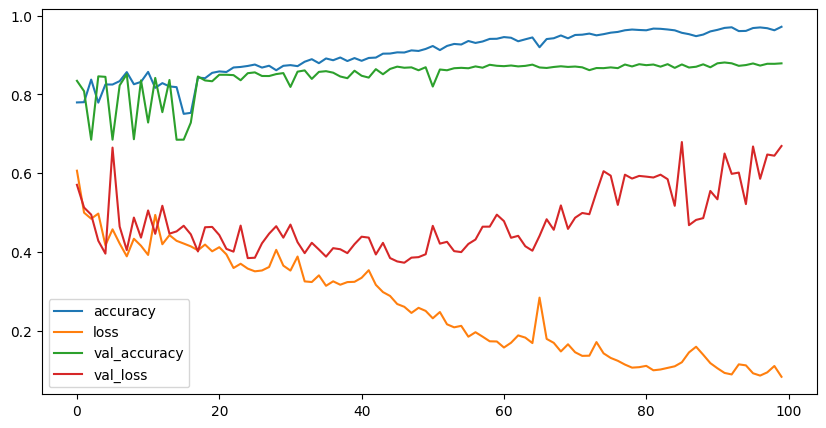

In [332]:
loss_acc_metrix_Df = pd.DataFrame(history.history)
loss_acc_metrix_Df.plot(figsize=(10,5))

In [269]:
# Find the maximum value in the dataset
max_value = np.max(x_train)

# Normalize x_train
x_train_scaled = x_train / max_value

# Transform x_test using the same normalization
x_test_scaled = x_test / max_value

In [270]:
x_test_scaled[0].shape

(128, 128, 5)

In [271]:
early_stopping = EarlyStopping(monitor='accuracy', patience=10, verbose=1, mode='min', restore_best_weights=True)

In [272]:
history_2 = model.fit(x_train_scaled, y_train, epochs=50, batch_size=1, validation_data=(x_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7360 - loss: 0.5878 - val_accuracy: 0.6848 - val_loss: 0.6390
Epoch 2/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7615 - loss: 0.5565 - val_accuracy: 0.6848 - val_loss: 0.6336
Epoch 3/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7381 - loss: 0.5794 - val_accuracy: 0.6848 - val_loss: 0.6488
Epoch 4/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7546 - loss: 0.5578 - val_accuracy: 0.6848 - val_loss: 0.6234
Epoch 5/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7493 - loss: 0.5712 - val_accuracy: 0.6848 - val_loss: 0.6341
Epoch 6/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7446 - loss: 0.5719 - val_accuracy: 0.6848 - val_loss: 0.6508
Epoch 7/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7544 - loss: 0.5654 - val_accuracy: 0.6848 - val_loss: 0.6280
Epoch 8/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7389 - loss: 0.5767 - val_accuracy: 0

In [273]:
model_eval = model.evaluate(x_test_scaled,y_test)
print(f"Test loss: {model_eval[0]}")
print(f"Test accuracy: {model_eval[1]}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step - accuracy: 0.6852 - loss: 0.6385
Test loss: 0.6390359401702881
Test accuracy: 0.6847854256629944


<Axes: >

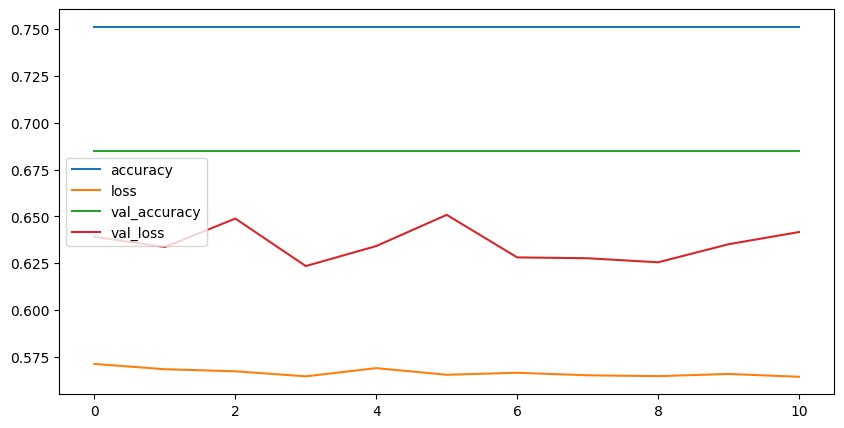

In [274]:
loss_acc_metrix_Df2 = pd.DataFrame(history_2.history)
loss_acc_metrix_Df2.plot(figsize=(10,5))

In [338]:

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(np.uint8)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Text(0.5, 1.0, 'Prediction')

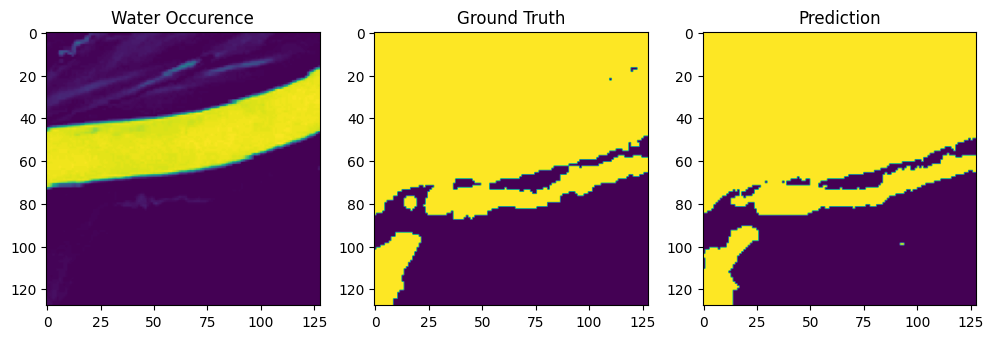

In [339]:
j=41
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(x_test[j][:,:,4])
plt.title('Water Occurence')
plt.subplot(1,3,2)
plt.imshow(y_test[j])
plt.title('Ground Truth')
plt.subplot(1,3,3)
plt.imshow(y_pred[j])
plt.title('Prediction')

In [340]:
from sklearn.metrics import f1_score, jaccard_score


# Flatten the arrays for F1 score and IoU calculation
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

# Calculate F1 score
f1 = f1_score(y_test_flat, y_pred_flat, average='binary')
print(f"F1 Score: {f1}")

# Calculate IoU
iou = jaccard_score(y_test_flat, y_pred_flat, average='binary')
print(f"IoU: {iou}")

F1 Score: 0.7979216589400994
IoU: 0.6637850726405679


In [341]:
model.save('Satelite_detection.h5')